In [3]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("C:/Users/User/DOCUME~1/카카오~1/DATA(E~1/Easy1.xlsx",header=0, names=['글자세트','그림세트','Set','Relation','Response','RT'])

In [21]:
data.head()

,글자세트,그림세트,Set,Relation,Response,RT
0,3,22,1,U,q,2.791737
1,19,19,0,R,r,0.831410
2,14,28,0,U,q,0.712592
3,15,17,0,U,q,0.635951
4,32,4,1,U,q,1.309636


In [22]:
data.shape

(3840, 6)

In [23]:
data.describe()

,글자세트,그림세트,Set,RT
count,3840.0000,3840.0000,3840.000000,3840.000000
mean,20.5000,20.5000,0.500000,0.706402
std,11.5449,11.5449,0.500065,0.791374
min,1.0000,1.0000,0.000000,0.031581
25%,10.7500,10.7500,0.000000,0.414778
50%,20.5000,20.5000,0.500000,0.532523
75%,30.2500,30.2500,1.000000,0.727027
max,40.0000,40.0000,1.000000,20.386082


In [27]:
data['cr'] = data['Set']

data.loc[(data["Relation"] == "U") & (data["Response"] == "q"), "cr"] = 1
data.loc[(data["Relation"] == "U") & (data["Response"] == "r"), "cr"] = 0
data.loc[(data["Relation"] == "R") & (data["Response"] == "r"), "cr"] = 1
data.loc[(data["Relation"] == "R") & (data["Response"] == "q"), "cr"] = 0
data

,글자세트,그림세트,Set,Relation,Response,RT,cr
0,3,22,1,U,q,2.791737,1
1,19,19,0,R,r,0.831410,1
2,14,28,0,U,q,0.712592,1
3,15,17,0,U,q,0.635951,1
4,32,4,1,U,q,1.309636,1
...,...,...,...,...,...,...,...
3835,8,16,0,U,q,1.221308,1
3836,26,26,1,R,r,1.360994,1
3837,17,17,1,R,r,0.400084,1
3838,2,40,1,U,q,0.526769,1


In [30]:
data.shape

(3840, 7)

In [28]:
data['cr'].unique()

array([1, 0], dtype=int64)

In [26]:
data[data['cr']==0]

,글자세트,그림세트,Set,Relation,Response,RT,cr
98,17,17,0,R,q,1.197526,0
155,8,16,0,U,r,2.248917,0
164,32,4,1,U,r,0.949666,0
179,6,6,0,R,q,2.422046,0
223,39,10,1,U,r,0.528438,0
...,...,...,...,...,...,...,...
3699,6,6,0,R,q,3.040416,0
3786,28,1,0,U,r,0.710098,0
3787,8,8,1,R,q,0.917642,0
3803,7,7,0,R,q,0.663720,0


#  
# Data preprocessing

{'whiskers': [<matplotlib.lines.Line2D at 0x2886a5abdc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2886a5aed08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2886a5ab308>],
 'medians': [<matplotlib.lines.Line2D at 0x2886a5b4c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2886a5b4d88>],
 'means': []}

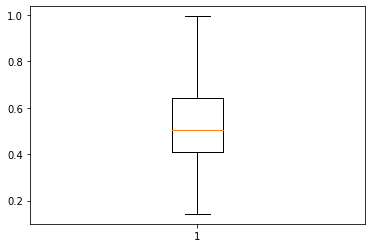

In [95]:
set_0 = data[data['Set']==0]
set_0_RT=set_0[(set_0["RT"] < 0.998) & (set_0["RT"]>0.0426)]
plt.boxplot(set_0_RT['RT']) 
#outlyer 이상치

{'whiskers': [<matplotlib.lines.Line2D at 0x28869481588>,
 'caps': [<matplotlib.lines.Line2D at 0x28869481e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2886947ba48>],
 'medians': [<matplotlib.lines.Line2D at 0x28869485dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2886948ac48>],
 'means': []}

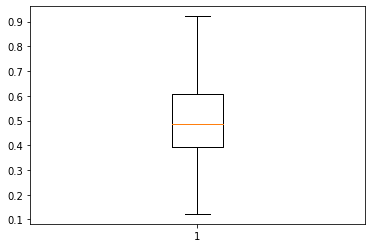

In [96]:
set_1 = data[data['Set']==1]
set_1_RT=set_1[(set_1["RT"] < 0.925) & (set_1["RT"]>0.032)]
plt.boxplot(set_1_RT['RT'])

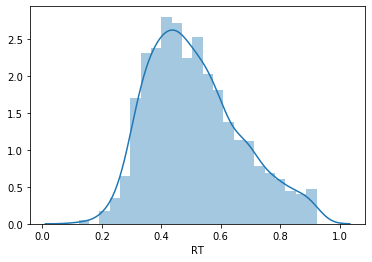

In [97]:
sns.distplot(set_1_RT['RT'])

#  
# Dividing the Data Frame

In [98]:
set_0.shape

(1920, 7)

In [99]:
set_1.shape

(1920, 7)

#  
# Creating mean vector lists

In [100]:
data

,글자세트,그림세트,Set,Relation,Response,RT,cr
0,3,22,1,U,q,2.791737,1
1,19,19,0,R,r,0.831410,1
2,14,28,0,U,q,0.712592,1
3,15,17,0,U,q,0.635951,1
4,32,4,1,U,q,1.309636,1
...,...,...,...,...,...,...,...
3835,8,16,0,U,q,1.221308,1
3836,26,26,1,R,r,1.360994,1
3837,17,17,1,R,r,0.400084,1
3838,2,40,1,U,q,0.526769,1


In [109]:
mean_set0 = []
cr_set0 = []
for n in range(1,25) :
    ddd = set_0[80*(n-1):80*n]
    ddd1 = ddd[(ddd['RT'] < 0.998) & (ddd['RT'] > 0.0426)]
    mean = ddd1['RT'].mean()
    mean_set0.append(mean)
    cr = ddd1['cr'].sum()
    cr1 = cr/len(ddd1['RT'])
    cr_set0.append(cr1)
    
mean_set0

[0.6371286140350876,
 0.6800853771927537,
 0.6233623347826205,
 0.4862933106663695,
 0.3292764075950235,
 0.43107498500003205,
 0.5050082960003056,
 0.5038873151516423,
 0.4826502828946104,
 0.6617630983057128,
 0.6466379881353301,
 0.4656079680556407,
 0.43953734459456745,
 0.4484140746835577,
 0.5426767066666647,
 0.6323921088235364,
 0.4317982037499178,
 0.5303524240504736,
 0.6022074635136075,
 0.4468838418919207,
 0.6428953365074925,
 0.640983873972576,
 0.5997686816894279,
 0.6683893899992108]

In [110]:
cr_set0

[1.0,
 1.0,
 0.9565217391304348,
 0.9466666666666667,
 0.9367088607594937,
 0.925,
 0.9733333333333334,
 0.9848484848484849,
 0.9868421052631579,
 0.9661016949152542,
 0.9491525423728814,
 0.9583333333333334,
 0.918918918918919,
 1.0,
 0.9666666666666667,
 0.9705882352941176,
 0.9375,
 0.9873417721518988,
 0.9324324324324325,
 0.8378378378378378,
 0.9523809523809523,
 0.9863013698630136,
 0.9154929577464789,
 0.94]

In [111]:
mean_set1 = []
cr_set1 = []

for n in range(1,25) :
    aaa = set_1[80*(n-1):80*n]
    aaa1 = aaa[(aaa['RT'] < 0.925) & (aaa['RT'] > 0.032)]
    mean = aaa1['RT'].mean()
    mean_set1.append(mean)
    cr = aaa1['cr'].sum()
    cr1 = cr/len(aaa1['RT'])
    cr_set1.append(cr1)

mean_set1

[0.5940311196721223,
 0.6393268849076879,
 0.6126643857143456,
 0.4753317946666599,
 0.35225408717969214,
 0.42449194999985596,
 0.49594246266666836,
 0.4854213705881621,
 0.4164666041100122,
 0.574804817241439,
 0.6217221867921597,
 0.4787152527778744,
 0.41211172077915265,
 0.43991229746832317,
 0.5161323249999946,
 0.6416119836065564,
 0.4105274050000389,
 0.5092843089740853,
 0.5697126357142094,
 0.44360977297312915,
 0.5902166249993267,
 0.616926506493738,
 0.5553308366199391,
 0.6311487183663804]

In [112]:
cr_set1

[1.0,
 0.9811320754716981,
 0.9795918367346939,
 0.9733333333333334,
 0.9615384615384616,
 0.875,
 0.96,
 1.0,
 0.9863013698630136,
 1.0,
 0.9811320754716981,
 0.9305555555555556,
 0.948051948051948,
 0.9367088607594937,
 0.9444444444444444,
 0.9836065573770492,
 0.875,
 0.9743589743589743,
 0.9571428571428572,
 0.9459459459459459,
 0.9833333333333333,
 1.0,
 0.9859154929577465,
 0.9387755102040817]

#  
# Statistical Testing

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([0.35225409, 0.41052741, 0.41211172, 0.4164666 , 0.42449195,
         0.4399123 , 0.44360977, 0.47533179, 0.47871525, 0.48542137,
         0.49594246, 0.50928431, 0.51613232, 0.55533084, 0.56971264,
         0.57480482, 0.59021662, 0.59403112, 0.61266439, 0.61692651,
         0.62172219, 0.63114872, 0.63932688, 0.64161198])),
 (0.08934362938357411, 0.5211540855129814, 0.97511882559265))

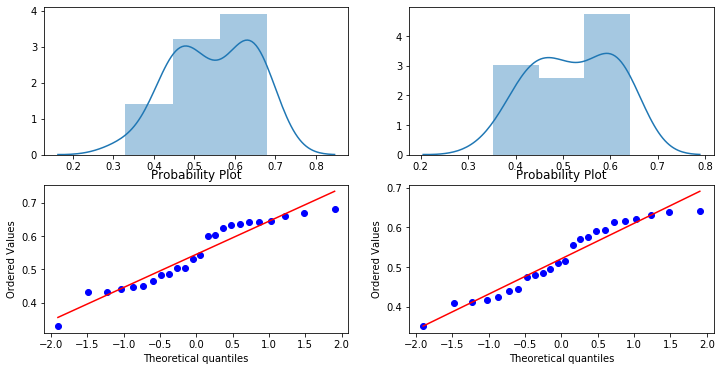

In [113]:
from scipy.stats import probplot

f, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.distplot(mean_set0, hist=True, ax=axes[0][0])
probplot(mean_set0, plot=axes[1][0]) #scipy.stats.probplot

sns.distplot(mean_set1, hist=True, ax=axes[0][1])
probplot(mean_set1, plot=axes[1][1]) #scipy.stats.probplot

In [114]:
import scipy

In [121]:
print(scipy.stats.shapiro(cr_set0))
print(scipy.stats.shapiro(cr_set1))
print(scipy.stats.bartlett(cr_set0, cr_set1))

(0.8888527154922485, 0.012586225755512714)
(0.8579974174499512, 0.0030881690327078104)
BartlettResult(statistic=0.045300594506898044, pvalue=0.8314522597510805)


In [122]:
scipy.stats.wilcoxon(cr_set0, y=cr_set1, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=102.0, pvalue=0.2735436610893661)

In [115]:
print(scipy.stats.shapiro(mean_set0))
print(scipy.stats.shapiro(mean_set1))
print(scipy.stats.bartlett(mean_set0, mean_set1))

(0.9189748167991638, 0.055441685020923615)
(0.9345122575759888, 0.12299489974975586)
BartlettResult(statistic=0.32628875440157307, pvalue=0.5678526192425599)


In [117]:
scipy.stats.wilcoxon(mean_set0, y=mean_set1, zero_method='wilcox', correction=False)

WilcoxonResult(statistic=25.0, pvalue=0.00035503938074694154)

In [118]:
import numpy as np
print('글 - 그림 세트의 평균 반응속도: ', np.array(mean_set0).mean())
print('그림 - 글 세트의 평균 반응속도: ', np.array(mean_set1).mean())

글 - 그림 세트의 평균 반응속도:  0.5449614761649201
그림 - 글 세트의 평균 반응속도:  0.5211540855129814


In [123]:
print('글 - 그림 세트의 평균 정답률: ', np.array(cr_set0).mean())
print('그림 - 글 세트의 평균 정답률: ', np.array(cr_set1).mean())

글 - 그림 세트의 평균 정답률:  0.9553737459964733
그림 - 글 세트의 평균 정답률:  0.962577859689347


In [119]:
scipy.stats.ttest_rel(mean_set0, mean_set1, axis=0, nan_policy='propagate')

Ttest_relResult(statistic=4.698612099736272, pvalue=9.86581720489321e-05)